# Significance test
## is the grouping_countries.csv actually valid?
# Descrption
We have grouped the countries into "teams", based on their government's ideology, affinity etc.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def calculate_partition_goodness(adjmat_df, partition_df):
    # Initialize counters for within-group and between-group strengths
    within_group_strength = 0
    within_group_count = 0
    between_group_strength = 0
    between_group_count = 0

    index = adjmat_df.index
    
    # Enumerate over each pair of nodes
    for i in range(adjmat_df.shape[0]):
        for j in range(i+1, adjmat_df.shape[0]):  # We start from i+1 to avoid double-counting edges
            edge_strength = adjmat_df.loc[index[i],index[j]]
            
            # Check if nodes i and j are in the same group
            if partition_df.loc[index[i]] == partition_df.loc[index[j]]:
                within_group_strength += edge_strength
                within_group_count += 1
            else:
                between_group_strength += edge_strength
                between_group_count += 1
    
    # Calculate average strengths
    if within_group_count == 0:
        avg_within_group_strength = 0
    else:
        avg_within_group_strength = within_group_strength / within_group_count
    if between_group_count == 0:
        avg_between_group_strength = 0
    else:
        avg_between_group_strength = between_group_strength / between_group_count
    
    # Calculate the goodness measure: the ratio of the average within-group strength to the average between-group strength
    """
    if avg_between_group_strength == 0:
        goodness = np.inf if avg_within_group_strength > 0 else 1
    else:
        goodness = avg_within_group_strength / avg_between_group_strength
    """
    eps = 1e-10
    goodness = avg_within_group_strength / (avg_between_group_strength + eps)
    return goodness

def permutation_test(adjmat, partition, n_permutations=1000):
    n = len(partition)
    observed_goodness = calculate_partition_goodness(adjmat, partition)
    goodness_values = []
    for _ in range(n_permutations):
        if _ % 100 == 0:
            print("iteration:", _)
        np.random.shuffle(partition)
        goodness = calculate_partition_goodness(adjmat, partition)
        goodness_values.append(goodness)
    p_value = sum(i > observed_goodness for i in goodness_values) / n_permutations
    return p_value, observed_goodness, goodness_values


In [10]:
adjmat_df = pd.read_csv('IGO_adjmat.csv', index_col=0)
partition_df = pd.read_csv('grouping_countries.csv', index_col='CtryAbb')
partition_df = partition_df['lv1']
partition_df = partition_df[partition_df != 0]
index = list(partition_df.index)
adjmat_df = adjmat_df.loc[index, index]

In [11]:
np.random.seed(0)  # for reproducibility
p_value, observed_goodness, goodness_values = permutation_test(adjmat_df, partition_df, n_permutations=2000)

iteration: 0


/var/folders/cr/4ychhhxn41b3ts91p71bs_040000gn/T/ipykernel_66583/2141801601.py:2: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  p_value, observed_goodness, goodness_values = permutation_test(adjmat_df, partition_df, n_permutations=2000)


iteration: 100
iteration: 200
iteration: 300
iteration: 400
iteration: 500
iteration: 600
iteration: 700
iteration: 800
iteration: 900
iteration: 1000
iteration: 1100
iteration: 1200
iteration: 1300
iteration: 1400
iteration: 1500
iteration: 1600
iteration: 1700
iteration: 1800
iteration: 1900


observed goodness: 1.3560586265807641 p-value: 0.0


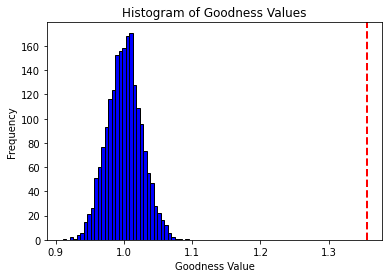

<Figure size 432x288 with 0 Axes>

In [12]:
print("observed goodness:", observed_goodness, "p-value:", p_value)
plt.hist(goodness_values, bins='auto', color='blue', edgecolor='black')
plt.title('Histogram of Goodness Values')
plt.xlabel('Goodness Value')
plt.ylabel('Frequency')
plt.axvline(x=observed_goodness, color='r', linestyle='dashed', linewidth=2)  # Line for observed goodness
plt.show()
plt.savefig('goodness_histogram_lv1.png', dpi=300)

In [13]:
adjmat_df = pd.read_csv('IGO_adjmat.csv', index_col=0)
partition_df = pd.read_csv('grouping_countries.csv', index_col='CtryAbb')
partition_df = partition_df['lv2']
partition_df = partition_df[partition_df != 0]
index = list(partition_df.index)
adjmat_df = adjmat_df.loc[index, index]

In [14]:
np.random.seed(0)  # for reproducibility
p_value, observed_goodness, goodness_values = permutation_test(adjmat_df, partition_df, n_permutations=2000)

iteration: 0


/var/folders/cr/4ychhhxn41b3ts91p71bs_040000gn/T/ipykernel_66583/2141801601.py:2: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  p_value, observed_goodness, goodness_values = permutation_test(adjmat_df, partition_df, n_permutations=2000)


iteration: 100
iteration: 200
iteration: 300
iteration: 400
iteration: 500
iteration: 600
iteration: 700
iteration: 800
iteration: 900
iteration: 1000
iteration: 1100
iteration: 1200
iteration: 1300
iteration: 1400
iteration: 1500
iteration: 1600
iteration: 1700
iteration: 1800
iteration: 1900


observed goodness: 1.1659460188330164 p-value: 0.0


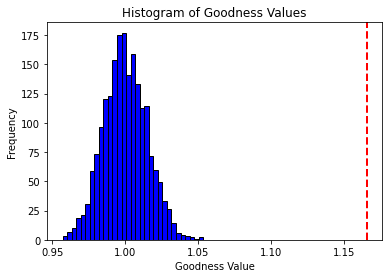

<Figure size 432x288 with 0 Axes>

In [15]:
print("observed goodness:", observed_goodness, "p-value:", p_value)
plt.hist(goodness_values, bins='auto', color='blue', edgecolor='black')
plt.title('Histogram of Goodness Values')
plt.xlabel('Goodness Value')
plt.ylabel('Frequency')
plt.axvline(x=observed_goodness, color='r', linestyle='dashed', linewidth=2)  # Line for observed goodness
plt.show()
plt.savefig('goodness_histogram_lv2.png', dpi=300)